In [1]:
    """
Pidgin is a literate computing implementation in IPython.  It allows authors to compose their source in the markup language of their choice (e.g. Markdown, RST, Latex).  Narrative, source code, and documentation tests are composed together.

    """

'\nPidgin is a literate computing implementation in IPython.  It allows authors to compose their source in the markup language of their choice (e.g. Markdown, RST, Latex).  Narrative, source code, and documentation tests are composed together.\n\n'

In [2]:
    __all__ = 'Pidgin',

In [3]:
    _run_as_main =  __name__ == '__main__'
    _run_as_script = _run_as_main and globals().get('__file__', None) in __import__('sys').argv
    _run_as_interactive = _run_as_main and not _run_as_script    

In [4]:
    import ast, textwrap, re, doctest, functools, collections, contextlib, sys
    import pandocfilters, traitlets, IPython, nbconvert, jinja2.meta, jinja2.ext
    import importnb, htmlmin, xonsh
    
    get_ipython = IPython.get_ipython
    shell = get_ipython()

    pidgin=\
    10 and _run_as_interactive and __import__('pidgin').load()

import ast, textwrap, re, doctest, functools, collections, contextlib, sys
    import pandocfilters, traitlets, IPython, nbconvert, jinja2.meta, jinja2.ext
    import importnb, htmlmin, xonsh
    
    get_ipython = IPython.get_ipython
    shell = get_ipython()

    pidgin=\
    10 and _run_as_interactive and __import__('pidgin').load()

## Vocab

## Pidgin programming

* The input generates the output, but is ignored in publishing.

In [5]:
    """
## The `IPython` pidgin implementation

### `IPython` as a literate computing implementation.
    
    """

'\n## The `IPython` pidgin implementation\n\n### `IPython` as a literate computing implementation.\n\n'

"""
## The `IPython` pidgin implementation

### `IPython` as a literate computing implementation.
    
    """

In [6]:
## Markup application language


## Markup application language

In [7]:
    input_formats = !pandoc --list-input-formats
    output_formats = !pandoc --list-output-formats    

    def translate(source=None, input='markdown', target='rst', file=None, args='', *, lang='ipython'):
        if callable(target): return target(source)
        import json, subprocess
        process = subprocess.Popen(['pandoc', f'--read={input}', f'--write={target}', *F"--indented-code-classes={lang} {args}".rstrip().split()], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
        returns = process.communicate(source.encode())[0].decode()
        if target in {'json'}: return json.loads(returns)
        return returns

input_formats = !pandoc --list-input-formats
    output_formats = !pandoc --list-output-formats    

    def translate(source=None, input='markdown', target='rst', file=None, args='', *, lang='ipython'):
        if callable(target): return target(source)
        import json, subprocess
        process = subprocess.Popen(['pandoc', f'--read={input}', f'--write={target}', *F"--indented-code-classes={lang} {args}".rstrip().split()], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
        returns = process.communicate(source.encode())[0].decode()
        if target in {'json'}: return json.loads(returns)
        return returns

In [8]:
    def python(source, input='markdown'):
        if should_not_transform_source(source): return source
        def action(type, value, format, metadata):
            nonlocal code, remaining, min_indent
            if type == 'CodeBlock':
                if ''.join(value[0][1]) == 'ipython':
                    splitter = re.compile(''.join("\\s{0,4}%s\\s*"%re.escape(x) for x in value[1].splitlines() if x.strip()))

                    try: before, after = re.split(splitter, remaining, 1)
                    except:  before = after = ''
                    current = len(after) and remaining[len(before):-len(after)] or remaining[len(before):]
                    if current.lstrip().startswith('```'): return
                    remaining = after

                    # Extract the first line of the current code block.
                    first_line = get_first_line(current)
                    # Construct the code we'll 
                    current, body = ''.join(current), ''.join(before)

                    # The previous last line append
                    last_line = get_last_line(code.splitlines())

                    if not last_line.endswith(('"'*3, "'"*3, '-'*3, '"'*3+"\\", "'"*3+'\\',)): body = quote(body, '')

                    definition = last_line.rstrip().endswith(':')

                    this_indent = get_line_indent(first_line)                  
                    min_indent = min_indent or this_indent

                    # The current indent level so far.
                    prior_indent = get_line_indent(last_line) or min_indent

                    if this_indent < min_indent:
                        current = textwrap.indent(current, ' '*(min_indent-this_indent))
                        this_indent = get_line_indent(get_first_line(current.splitlines()))

                    indent = max(min_indent, (has_return(code) and min or max)(prior_indent, this_indent))        
                    if definition:
                        if prior_indent >= indent: indent = (prior_indent + 4)
                        body = hanging_indent(textwrap.indent(body, ' '*min_indent), ' '*(indent-min_indent))
                    else: body = textwrap.indent(body, ' '*indent)

                    code += body+current
                    
        remaining, code, min_indent = source, """""", 0
        pandocfilters.walk(translate(source, input, 'json'), action, 'python', {})
        if remaining.strip(): code += textwrap.indent(quote(remaining), ' '*min_indent).rstrip() + ';'
        return textwrap.dedent(code)

def python(source, input='markdown'):
        if should_not_transform_source(source): return source
        def action(type, value, format, metadata):
            nonlocal code, remaining, min_indent
            if type == 'CodeBlock':
                if ''.join(value[0][1]) == 'ipython':
                    splitter = re.compile(''.join("\\s{0,4}%s\\s*"%re.escape(x) for x in value[1].splitlines() if x.strip()))

                    try: before, after = re.split(splitter, remaining, 1)
                    except:  before = after = ''
                    current = len(after) and remaining[len(before):-len(after)] or remaining[len(before):]
                    if current.lstrip().startswith('```'): return
                    remaining = after

                    # Extract the first line of the current code block.
                    first_line = get_first_line(current)
                    # Construct the code we'll 
                    current, body = ''.join(current), ''.join(before)

                    # The previous last line append
                    last_line = get_last_line(code.splitlines())

                    if not last_line.endswith(('"'*3, "'"*3, '-'*3, '"'*3+"\\", "'"*3+'\\',)): body = quote(body, '')

                    definition = last_line.rstrip().endswith(':')

                    this_indent = get_line_indent(first_line)                  
                    min_indent = min_indent or this_indent

                    # The current indent level so far.
                    prior_indent = get_line_indent(last_line) or min_indent

                    if this_indent < min_indent:
                        current = textwrap.indent(current, ' '*(min_indent-this_indent))
                        this_indent = get_line_indent(get_first_line(current.splitlines()))

                    indent = max(min_indent, (has_return(code) and min or max)(prior_indent, this_indent))        
                    if definition:
                        if prior_indent >= indent: indent = (prior_indent + 4)
                        body = hanging_indent(textwrap.indent(body, ' '*min_indent), ' '*(indent-min_indent))
                    else: body = textwrap.indent(body, ' '*indent)

                    code += body+current
                    
        remaining, code, min_indent = source, """""", 0
        pandocfilters.walk(translate(source, input, 'json'), action, 'python', {})
        if remaining.strip(): code += textwrap.indent(quote(remaining), ' '*min_indent).rstrip() + ';'
        return textwrap.dedent(code)

In [9]:
    class Extension(traitlets.HasTraits):
        """
Extension

IPython extension
IPython events
Magics
Transformers
Observable objects.

    """
        shell = traitlets.Instance(IPython.InteractiveShell, help="""""", allow_none=True)
        enabled = traitlets.Bool(True, help="""""")
        
        def __init__(self, shell=None, **kwargs):
            traitlets.HasTraits.__init__(self, **kwargs)
            self.is_extension() and self.load_ipython_extension(self.shell)
            for trigger in self.triggers(): self.shell.events.register(trigger, getattr(self, trigger))

        @traitlets.default('shell')
        def _default_shell(self): return IPython.get_ipython()

        @traitlets.observe('enabled')
        def _observe_enabled(self, change=None): 
            if self.is_extension(): self.load_ipython_extension(self.shell) if change['new'] else self.unload_ipython_extension(self.shell) 
                
        def __enter__(self): self.enabled or self.load_ipython_extension(self.shell)            
        def __exit__(self, *e): self.enabled or self.unload_ipython_extension(self.shell)
            
        def is_extension(self): return hasattr(self, 'load_ipython_extension') and self.enabled
        
        def triggers(self): return list(object for object in IPython.core.events.available_events if hasattr(self, object))

    def load_ipython_extension(shell): pidgin_shell.enabled = True
    
    load = functools.partial(load_ipython_extension, shell)

    def unload_ipython_extension(shell): pidgin_shell.enabled = False

class Extension(traitlets.HasTraits):
        """
Extension

IPython extension
IPython events
Magics
Transformers
Observable objects.

    """
        shell = traitlets.Instance(IPython.InteractiveShell, help="""""", allow_none=True)
        enabled = traitlets.Bool(True, help="""""")
        
        def __init__(self, shell=None, **kwargs):
            traitlets.HasTraits.__init__(self, **kwargs)
            self.is_extension() and self.load_ipython_extension(self.shell)
            for trigger in self.triggers(): self.shell.events.register(trigger, getattr(self, trigger))

        @traitlets.default('shell')
        def _default_shell(self): return IPython.get_ipython()

        @traitlets.observe('enabled')
        def _observe_enabled(self, change=None): 
            if self.is_extension(): self.load_ipython_extension(self.shell) if change['new'] else self.unload_ipython_extension(self.shell) 
                
        def __enter__(self): self.enabled or self.load_ipython_extension(self.shell)            
        def __exit__(self, *e): self.enabled or self.unload_ipython_extension(self.shell)
            
        def is_extension(self): return hasattr(self, 'load_ipython_extension') and self.enabled
        
        def triggers(self): return list(object for object in IPython.core.events.available_events if hasattr(self, object))

    def load_ipython_extension(shell): pidgin_shell.enabled = True
    
    load = functools.partial(load_ipython_extension, shell)

    def unload_ipython_extension(shell): pidgin_shell.enabled = False

In [10]:
    class Tangle(Extension):
        input = traitlets.Enum(input_formats, 'markdown')
        def translate(self, source, target): 
            return target(source) if callable(target) else translate(source, self.input, target)
        python = functools.partialmethod(translate, target=python)
    
        def __call__(self, lines): return self.python(''.join(lines)).splitlines(True)
        
        def load_ipython_extension(self, shell): remove_doctest_cleanup(shell.input_transformer_manager), shell.input_transformer_manager.cleanup_transforms.insert(0, self)
            
        def unload_ipython_extension(self, shell): shell.input_transformer_manager.cleanup_transforms = [object for object in shell.input_transformer_manager.cleanup_transforms if not isinstance(object, Tangle)]
            
    [setattr(Tangle, object, functools.partialmethod(Tangle.translate, target=object)) for object in input_formats];

class Tangle(Extension):
        input = traitlets.Enum(input_formats, 'markdown')
        def translate(self, source, target): 
            return target(source) if callable(target) else translate(source, self.input, target)
        python = functools.partialmethod(translate, target=python)
    
        def __call__(self, lines): return self.python(''.join(lines)).splitlines(True)
        
        def load_ipython_extension(self, shell): remove_doctest_cleanup(shell.input_transformer_manager), shell.input_transformer_manager.cleanup_transforms.insert(0, self)
            
        def unload_ipython_extension(self, shell): shell.input_transformer_manager.cleanup_transforms = [object for object in shell.input_transformer_manager.cleanup_transforms if not isinstance(object, Tangle)]
            
    [setattr(Tangle, object, functools.partialmethod(Tangle.translate, target=object)) for object in input_formats];

### Bash as a systems level language

In [11]:
    class Bash(Extension):
        def load_ipython_extension(self, shell): remove_system_assign(shell), xonsh.main.setup();shell.compile = self.CachingCompiler()
        def unload_ipython_extension(self, shell): shell.compile = IPython.core.compilerop.CachingCompiler()

        class CachingCompiler(IPython.core.compilerop.CachingCompiler):
            def ast_parse(self, source, filename='<unknown>', symbol='exec'): return __import__('builtins').__xonsh__.execer._parse_ctx_free(source, symbol, filename)[0]
            
    def remove_system_assign(shell):  
        for i, transformer in enumerate(shell.input_transformer_manager.token_transformers): isinstance(transformer, type) and issubclass(transformer, IPython.core.inputtransformer2.SystemAssign) and shell.input_transformer_manager.token_transformers.pop(i); break

class Bash(Extension):
        def load_ipython_extension(self, shell): remove_system_assign(shell), xonsh.main.setup();shell.compile = self.CachingCompiler()
        def unload_ipython_extension(self, shell): shell.compile = IPython.core.compilerop.CachingCompiler()

        class CachingCompiler(IPython.core.compilerop.CachingCompiler):
            def ast_parse(self, source, filename='<unknown>', symbol='exec'): return __import__('builtins').__xonsh__.execer._parse_ctx_free(source, symbol, filename)[0]
            
    def remove_system_assign(shell):  
        for i, transformer in enumerate(shell.input_transformer_manager.token_transformers): isinstance(transformer, type) and issubclass(transformer, IPython.core.inputtransformer2.SystemAssign) and shell.input_transformer_manager.token_transformers.pop(i); break

In [12]:
    def remove_doctest_cleanup(input_transformer_manager):  
        for i, transformer in enumerate(input_transformer_manager.cleanup_transforms):
            try:
                if transformer.initial_re.pattern[1:4] == '>>>': input_transformer_manager.cleanup_transforms.pop(i); break
            except: ...

    def quote(str: str, punc: str='') -> str:
        str, leading_ws = ''.join(str), []
        lines = str.splitlines(True)
        _ = '"'*3
        if _ in str: _ = "'"*3 # it seems quotes are a problem
        if not str.strip(): _ = punc = ''
        while lines and (not lines[0].strip()): leading_ws.append(lines.pop(0))    
        str = ''.join(lines)
        end = len(str.rstrip())
        str, ending_ws = str[:end], str[end:]
        if str and str.endswith(_[0]): str += ' '                    
        return F"{''.join(leading_ws)}{_}{str}{_}{punc}{ending_ws}"

    def get_first_line(lines: (str, list), line: str='') -> str:
        if not isinstance(lines, (reversed, list)): lines = lines.splitlines()
        for line in lines or ['']: 
            if line.strip(): break
        return line

    def get_last_line(lines, line=''): return get_first_line(lines[::-1], line)

    def get_line_indent(line: str) -> int:   return len(line) - len(line.lstrip())

    def has_return(code: str) -> bool:
        code = '\n'.join(code)
        if 'return ' not in code: return False
        code = importnb.loader.dedent(code)
        try:
            node = ast.parse(code)
            while hasattr(node, 'body'): node = node.body[-1]
            return isinstance(node, ast.Return)
        except: ...

    def hanging_indent(str, indent: str, *, out="""""") -> str:
        for line in str.splitlines(True):
            if not line.strip(): out += line
            else:
                if out.strip(): out += line
                else: out += indent+line
        return out
    
    def strip_blank_lines(str): return '\n'.join(str if str.strip() else '' for str in ''.join(str).splitlines())

    def should_not_transform_source(str): return str.startswith('%%')    

def remove_doctest_cleanup(input_transformer_manager):  
        for i, transformer in enumerate(input_transformer_manager.cleanup_transforms):
            try:
                if transformer.initial_re.pattern[1:4] == '>>>': input_transformer_manager.cleanup_transforms.pop(i); break
            except: ...

    def quote(str: str, punc: str='') -> str:
        str, leading_ws = ''.join(str), []
        lines = str.splitlines(True)
        _ = '"'*3
        if _ in str: _ = "'"*3 # it seems quotes are a problem
        if not str.strip(): _ = punc = ''
        while lines and (not lines[0].strip()): leading_ws.append(lines.pop(0))    
        str = ''.join(lines)
        end = len(str.rstrip())
        str, ending_ws = str[:end], str[end:]
        if str and str.endswith(_[0]): str += ' '                    
        return F"{''.join(leading_ws)}{_}{str}{_}{punc}{ending_ws}"

    def get_first_line(lines: (str, list), line: str='') -> str:
        if not isinstance(lines, (reversed, list)): lines = lines.splitlines()
        for line in lines or ['']: 
            if line.strip(): break
        return line

    def get_last_line(lines, line=''): return get_first_line(lines[::-1], line)

    def get_line_indent(line: str) -> int:   return len(line) - len(line.lstrip())

    def has_return(code: str) -> bool:
        code = '\n'.join(code)
        if 'return ' not in code: return False
        code = importnb.loader.dedent(code)
        try:
            node = ast.parse(code)
            while hasattr(node, 'body'): node = node.body[-1]
            return isinstance(node, ast.Return)
        except: ...

    def hanging_indent(str, indent: str, *, out="""""") -> str:
        for line in str.splitlines(True):
            if not line.strip(): out += line
            else:
                if out.strip(): out += line
                else: out += indent+line
        return out
    
    def strip_blank_lines(str): return '\n'.join(str if str.strip() else '' for str in ''.join(str).splitlines())

    def should_not_transform_source(str): return str.startswith('%%')

In [13]:
### Documentation testing

### Documentation testing

In [14]:
    def run_docstring_examples(str, shell, verbose=False, compileflags=None):
        runner = doctest.DocTestRunner(verbose=verbose, optionflags=doctest.ELLIPSIS)
        globs = vars(shell.user_module); tests = []
        for finder in (doctest.DocTestFinder(verbose, InlineDoctestParser()), doctest.DocTestFinder(verbose)):
            tests.extend(finder.find(str, name=shell.user_module.__name__))
        with wrapped_compiler(shell):
            for test in tests: test.globs = globs;  runner.run(test, compileflags=compileflags, clear_globs=False)
        return runner

    @contextlib.contextmanager
    def wrapped_compiler(shell):
        def compiler(input, filename, symbol, *args, **kwargs):
            nonlocal shell
            return shell.compile(ast.Interactive(body=shell.transform_ast(shell.compile.ast_parse(shell.transform_cell(textwrap.indent(input, ' '*4)))).body), filename, 'single' )
        yield setattr(doctest, 'compile', compiler)
        try: doctest.compile = compile
        except: ...

    class InlineDoctestParser(doctest.DocTestParser):
        _tick_ = "`"    
        _EXAMPLE_RE = re.compile(F'{_tick_}(?P<indent>)(?P<source>[^{_tick_}]+){_tick_}')
        def _parse_example(self, m, name, lineno): return m.group('source'), None, '...', None

def run_docstring_examples(str, shell, verbose=False, compileflags=None):
        runner = doctest.DocTestRunner(verbose=verbose, optionflags=doctest.ELLIPSIS)
        globs = vars(shell.user_module); tests = []
        for finder in (doctest.DocTestFinder(verbose, InlineDoctestParser()), doctest.DocTestFinder(verbose)):
            tests.extend(finder.find(str, name=shell.user_module.__name__))
        with wrapped_compiler(shell):
            for test in tests: test.globs = globs;  runner.run(test, compileflags=compileflags, clear_globs=False)
        return runner

    @contextlib.contextmanager
    def wrapped_compiler(shell):
        def compiler(input, filename, symbol, *args, **kwargs):
            nonlocal shell
            return shell.compile(ast.Interactive(body=shell.transform_ast(shell.compile.ast_parse(shell.transform_cell(textwrap.indent(input, ' '*4)))).body), filename, 'single' )
        yield setattr(doctest, 'compile', compiler)
        try: doctest.compile = compile
        except: ...

    class InlineDoctestParser(doctest.DocTestParser):
        _tick_ = "`"    
        _EXAMPLE_RE = re.compile(F'{_tick_}(?P<indent>)(?P<source>[^{_tick_}]+){_tick_}')
        def _parse_example(self, m, name, lineno): return m.group('source'), None, '...', None

In [15]:
    class Doctest(Extension):                            
        def post_run_cell(self, result, *a, **kwargs): return run_docstring_examples(result.info.raw_cell, self.shell)

class Doctest(Extension):                            
        def post_run_cell(self, result, *a, **kwargs): return run_docstring_examples(result.info.raw_cell, self.shell)

In [16]:
    """
### Formatting and Weaving pidgin programs.

Modifies the application language.

    """

'\n### Formatting and Weaving pidgin programs.\n\nModifies the application language.\n\n'

"""
### Formatting and Weaving pidgin programs.

Modifies the application language.

    """

In [17]:
    class Formatter(IPython.core.formatters.DisplayFormatter):
        def __init__(self, *a, **k):
            super().__init__(*a, **k)
            for object in (
                ('matplotlib.figure', 'Axes', _show_axes),
                ('matplotlib.figure', 'Figure', _show_axes),
                ('matplotlib.axes._subplots', 'AxesSubplot', _show_axes),
                ('sympy.plotting.plot', 'Plot', _show_sympy_axes),
            ): self.mimebundle_formatter.for_type_by_name(*object)
                
        def finalize(self, object) -> str:
            if isinstance(object, str): 
                new = self.parent.user_ns.get(object, object)
                if new == object: return object
                if isinstance(new, str): return self.finalize(new)
                
            bundle, metadata = self.format(object)
            for type in [str for str in reversed(self.active_types) if str != 'text/plain']:
                if type in bundle: 
                    object = bundle[type]
                    if type.startswith('image') and ('svg' not in type):  object = _format_images(type, bundle)
                    if type == 'text/latex': 
                        if object.startswith('$$') and object.endswith('$$'): object = object[1:-1]
                    if type =='text/html': object = htmlmin.minify(object, remove_empty_space=True)
                    break
            return object
        
    def _show_axes(object):
        import matplotlib.backends.backend_svg; bytes = __import__('io').BytesIO()
        matplotlib.backends.backend_agg.FigureCanvasAgg(getattr(object, 'figure', object)).print_png(bytes)
        return _format_bytes(bytes.getvalue(), object)

    def _show_sympy_axes(object): 
        s = __import__('io').BytesIO()
        object.save(s)
        return _format_bytes(s.getvalue(), object)

    def _format_bytes(bytes, object):
        return {'text/html': _format_images('image/png', {'image/png': bytes}), 'text/plain': repr(object),}, {}

    def _format_images(type, bundle):
        str = bundle[type]        
        if isinstance(str, bytes): str = __import__('base64').b64encode(str).decode('utf-8')
        if type in ('image/svg+xml', 'text/html'):  ...
        elif str.startswith('http'): str = F"""<img src="{str}"/>"""
        else: str = F"""<img src="data:{type};base64,{str}"/>"""
        return str
    
    __formatter__ = Formatter(parent=shell)

class Formatter(IPython.core.formatters.DisplayFormatter):
        def __init__(self, *a, **k):
            super().__init__(*a, **k)
            for object in (
                ('matplotlib.figure', 'Axes', _show_axes),
                ('matplotlib.figure', 'Figure', _show_axes),
                ('matplotlib.axes._subplots', 'AxesSubplot', _show_axes),
                ('sympy.plotting.plot', 'Plot', _show_sympy_axes),
            ): self.mimebundle_formatter.for_type_by_name(*object)
                
        def finalize(self, object) -> str:
            if isinstance(object, str): 
                new = self.parent.user_ns.get(object, object)
                if new == object: return object
                if isinstance(new, str): return self.finalize(new)
                
            bundle, metadata = self.format(object)
            for type in [str for str in reversed(self.active_types) if str != 'text/plain']:
                if type in bundle: 
                    object = bundle[type]
                    if type.startswith('image') and ('svg' not in type):  object = _format_images(type, bundle)
                    if type == 'text/latex': 
                        if object.startswith('$$') and object.endswith('$$'): object = object[1:-1]
                    if type =='text/html': object = htmlmin.minify(object, remove_empty_space=True)
                    break
            return object
        
    def _show_axes(object):
        import matplotlib.backends.backend_svg; bytes = __import__('io').BytesIO()
        matplotlib.backends.backend_agg.FigureCanvasAgg(getattr(object, 'figure', object)).print_png(bytes)
        return _format_bytes(bytes.getvalue(), object)

    def _show_sympy_axes(object): 
        s = __import__('io').BytesIO()
        object.save(s)
        return _format_bytes(s.getvalue(), object)

    def _format_bytes(bytes, object):
        return {'text/html': _format_images('image/png', {'image/png': bytes}), 'text/plain': repr(object),}, {}

    def _format_images(type, bundle):
        str = bundle[type]        
        if isinstance(str, bytes): str = __import__('base64').b64encode(str).decode('utf-8')
        if type in ('image/svg+xml', 'text/html'):  ...
        elif str.startswith('http'): str = F"""<img src="{str}"/>"""
        else: str = F"""<img src="data:{type};base64,{str}"/>"""
        return str
    
    __formatter__ = Formatter(parent=shell)

In [18]:
    def import_yaml():
        try: from ruamel import yaml
        except: 
            try: import yaml
            except:...
        return yaml

    def front_matter(source):
        try:
            if source.startswith('---\n') and (source.rindex('\n---\n') > 0):
                data, sep, rest = source.lstrip('-').partition('\n---\n')
                data = import_yaml().safe_load(__import__('io').StringIO(data))
                if isinstance(data, dict): return rest, data
        except ValueError: ...
        return source, {}

def import_yaml():
        try: from ruamel import yaml
        except: 
            try: import yaml
            except:...
        return yaml

    def front_matter(source):
        try:
            if source.startswith('---\n') and (source.rindex('\n---\n') > 0):
                data, sep, rest = source.lstrip('-').partition('\n---\n')
                data = import_yaml().safe_load(__import__('io').StringIO(data))
                if isinstance(data, dict): return rest, data
        except ValueError: ...
        return source, {}

In [19]:
    class Weave(Extension):
        display_formatter = traitlets.Instance(IPython.core.formatters.DisplayFormatter)
        observable = traitlets.Instance(traitlets.HasTraits)
        environment = traitlets.Instance(jinja2.Environment, allow_none=True)
        input = traitlets.Enum(input_formats, 'markdown')
        
        @traitlets.default('environment')
        def _default_environment(self): return create_environment()
        
        @traitlets.default('observable')
        def _default_observable(self): global __observable__; return __observable__
        
        @traitlets.default('display_formatter')
        def _default_formatter(self): global __formatter__; return __formatter__
        
        def render(self, source, **k):
            source, metadata = front_matter(source)
            def finalize(ctx, object): return self.display_formatter.finalize(object)
            
            finalize.contextfunction = finalize.evalcontextfunction = finalize.environmentfunction = True
            
            template = self.environment.overlay(finalize=finalize).from_string(source)
            display_id = IPython.display.DisplayHandle()

            def update(change=None, init=False):
                nonlocal source, self, display_id, template, k, metadata
                object = template.render(**collections.ChainMap(k, metadata, self.shell.user_ns, self.shell.user_ns.get('__annotations__', {}), vars(__import__('builtins'))))
                data = {'text/html': translate(object, self.input, 'html'), 'text/plain': source,}
                getattr(display_id, init and 'display' or 'update')(data, metadata=metadata, raw=True)
                
            update(init=True)            
            
            undeclared = jinja2.meta.find_undeclared_variables(template.environment.parse(source))
            if undeclared:
                for var in undeclared: self.observable.has_trait(var) or self.observable.add_traits(**{var: traitlets.Any()})
                self.observable.observe(update, undeclared)
        
        def post_run_cell(self, result): self.enabled and result.info.raw_cell.splitlines()[0].strip() and self.render(result.info.raw_cell)

class Weave(Extension):
        display_formatter = traitlets.Instance(IPython.core.formatters.DisplayFormatter)
        observable = traitlets.Instance(traitlets.HasTraits)
        environment = traitlets.Instance(jinja2.Environment, allow_none=True)
        input = traitlets.Enum(input_formats, 'markdown')
        
        @traitlets.default('environment')
        def _default_environment(self): return create_environment()
        
        @traitlets.default('observable')
        def _default_observable(self): global __observable__; return __observable__
        
        @traitlets.default('display_formatter')
        def _default_formatter(self): global __formatter__; return __formatter__
        
        def render(self, source, **k):
            source, metadata = front_matter(source)
            def finalize(ctx, object): return self.display_formatter.finalize(object)
            
            finalize.contextfunction = finalize.evalcontextfunction = finalize.environmentfunction = True
            
            template = self.environment.overlay(finalize=finalize).from_string(source)
            display_id = IPython.display.DisplayHandle()

            def update(change=None, init=False):
                nonlocal source, self, display_id, template, k, metadata
                object = template.render(**collections.ChainMap(k, metadata, self.shell.user_ns, self.shell.user_ns.get('__annotations__', {}), vars(__import__('builtins'))))
                data = {'text/html': translate(object, self.input, 'html'), 'text/plain': source,}
                getattr(display_id, init and 'display' or 'update')(data, metadata=metadata, raw=True)
                
            update(init=True)            
            
            undeclared = jinja2.meta.find_undeclared_variables(template.environment.parse(source))
            if undeclared:
                for var in undeclared: self.observable.has_trait(var) or self.observable.add_traits(**{var: traitlets.Any()})
                self.observable.observe(update, undeclared)
        
        def post_run_cell(self, result): self.enabled and result.info.raw_cell.splitlines()[0].strip() and self.render(result.info.raw_cell)

In [20]:
    def create_environment(): return nbconvert.TemplateExporter().environment

def create_environment(): return nbconvert.TemplateExporter().environment

In [21]:
    class Observable(traitlets.HasTraits):
        shell = traitlets.Instance(IPython.InteractiveShell)
        def __init__(self, *a, **k): super().__init__(*a, **k), self.shell.events.register('post_execute', self)
        def __call__(self, change=None): [setattr(self, trait, self.shell.user_ns.get(trait, None)) for trait in self.traits()]
                
    __observable__ = Observable(shell=shell)

class Observable(traitlets.HasTraits):
        shell = traitlets.Instance(IPython.InteractiveShell)
        def __init__(self, *a, **k): super().__init__(*a, **k), self.shell.events.register('post_execute', self)
        def __call__(self, change=None): [setattr(self, trait, self.shell.user_ns.get(trait, None)) for trait in self.traits()]
                
    __observable__ = Observable(shell=shell)

### Readable and reusable pidgin docs.

In [22]:
    class PreProcessor(nbconvert.preprocessors.Preprocessor):
        target = traitlets.Any(default_value='rst')
        def preprocess_cell(self, cell, metadata, id):
            if cell['cell_type'] in {'code', 'markdown'}:
                _, source = metadata['metadata']['name'].rsplit('.', 1)
                if source == 'md': source = 'markdown'
                cell['source'] = translate(cell['source'], source, self.target)
            return cell, metadata

class PreProcessor(nbconvert.preprocessors.Preprocessor):
        target = traitlets.Any(default_value='rst')
        def preprocess_cell(self, cell, metadata, id):
            if cell['cell_type'] in {'code', 'markdown'}:
                _, source = metadata['metadata']['name'].rsplit('.', 1)
                if source == 'md': source = 'markdown'
                cell['source'] = translate(cell['source'], source, self.target)
            return cell, metadata

In [23]:
    class PidginMixin:
        extensions = '.md.ipynb', '.rst.ipynb', '.textile.ipynb'
        splitter = IPython.core.inputtransformer2.TransformerManager()
        remove_doctest_cleanup(splitter)
        def code(self, str: str) -> str:  
            global splitter
            try: _, format, __ = self.path.rsplit('.')
            except: format = 'markdown'
            if format == 'md': format='markdown'
            return self.splitter.transform_cell(python(str))
        

    class Pidgin(PidginMixin, importnb.Notebook): ...

class PidginMixin:
        extensions = '.md.ipynb', '.rst.ipynb', '.textile.ipynb'
        splitter = IPython.core.inputtransformer2.TransformerManager()
        remove_doctest_cleanup(splitter)
        def code(self, str: str) -> str:  
            global splitter
            try: _, format, __ = self.path.rsplit('.')
            except: format = 'markdown'
            if format == 'md': format='markdown'
            return self.splitter.transform_cell(python(str))
        

    class Pidgin(PidginMixin, importnb.Notebook): ...

#### Command line usage.

In [24]:
    class PidginParameterize(PidginMixin, importnb.Parameterize): ...

    if _run_as_script:
        """
Command line usage.

        """
        sys.argv = sys.argv[1:]
        PidginParameterize.load(sys.argv[0])
        

class PidginParameterize(PidginMixin, importnb.Parameterize): ...

    if _run_as_script:
        """
Command line usage.

        """
        sys.argv = sys.argv[1:]
        PidginParameterize.load(sys.argv[0])

In [25]:
    class InteractiveShell(Extension):
        extensions = traitlets.List()
        @traitlets.default('extensions')
        def _default_extensions(self): return [object(enabled=False, shell=self.shell) for object in (Tangle, Bash, Doctest, Weave)]
        
        def load_ipython_extension(self, shell, bool=True): 
            for object in self.extensions: object.enabled = bool
                
        unload_ipython_extension = functools.partialmethod(load_ipython_extension, bool=False)

class InteractiveShell(Extension):
        extensions = traitlets.List()
        @traitlets.default('extensions')
        def _default_extensions(self): return [object(enabled=False, shell=self.shell) for object in (Tangle, Bash, Doctest, Weave)]
        
        def load_ipython_extension(self, shell, bool=True): 
            for object in self.extensions: object.enabled = bool
                
        unload_ipython_extension = functools.partialmethod(load_ipython_extension, bool=False)

In [26]:
    pidgin_shell = InteractiveShell(enabled=False, shell=shell)

pidgin_shell = InteractiveShell(enabled=False, shell=shell)

[NbConvertApp] Converting notebook pidgin.ipynb to python
[NbConvertApp] Writing 18186 bytes to pidgin.py
Fixing /Users/tonyfast/pidgin/pidgin.py
reformatted pidgin.py
All done! ✨ 🍰 ✨
1 file reformatted.
🏋️‍♀️
parsing /Users/tonyfast/pidgin/pidgin.py...


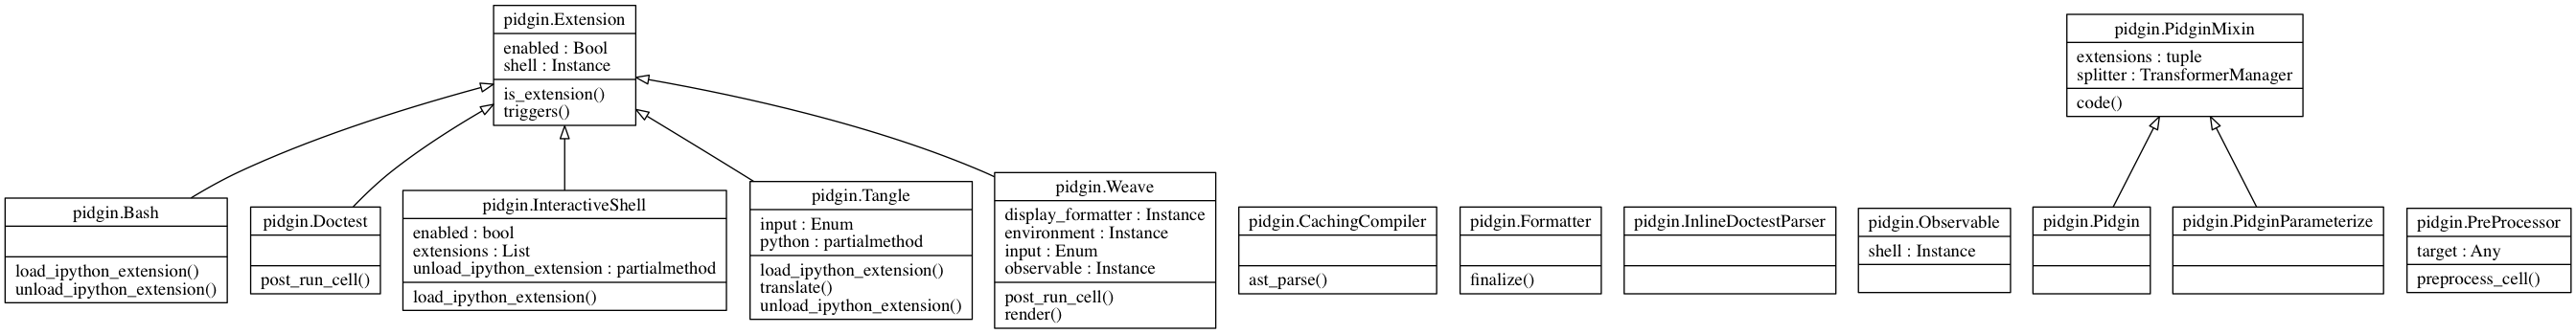

## Developer

    if _run_as_interactive:
        !jupyter nbconvert --to python --TemplateExporter.exclude_input_prompt=True pidgin.ipynb
        !isort pidgin.py
        !black pidgin.py
        !pyflakes pidgin.py && echo "🏋️‍♀️"
        !pyreverse -my -opng  -ppidgin pidgin
        IPython.display.display(IPython.display.Image('classes_pidgin.png', embed=True))

In [27]:
    ## Developer

    if _run_as_interactive:
        !jupyter nbconvert --to python --TemplateExporter.exclude_input_prompt=True pidgin.ipynb
        !isort pidgin.py
        !black pidgin.py
        !pyflakes pidgin.py && echo "🏋️‍♀️"
        !pyreverse -my -opng  -ppidgin pidgin
        IPython.display.display(IPython.display.Image('classes_pidgin.png', embed=True))